<a href="https://colab.research.google.com/github/WhiteJaeger/googleColab/blob/master/Lab_2%2C_IAD%2C_Kashchikhin_Andrej.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Определение говорящего персонажа из South Park 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls -la ./drive/My\ Drive/Colab\ Notebooks/All-seasons.csv

-rw------- 1 root root 5533363 Sep 20  2019 './drive/My Drive/Colab Notebooks/All-seasons.csv'


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Чтение данных
data = pd.read_csv('./drive/My Drive/Colab Notebooks/All-seasons.csv')

In [5]:
data.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [6]:
data.shape

(70896, 4)

In [0]:
# Смысла в этих двух столбцах большого нет, т.к. по ним нельзя определить, кто говорит.

data = data.drop(columns=['Season', 'Episode'])

In [14]:
# Очень много персонажей
# для классификации
len(data.Character.value_counts())

3950

In [16]:
data.Character.value_counts()[:10]

Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Chef             917
Kenny            881
Sharon           862
Mr. Mackey       633
Name: Character, dtype: int64

In [9]:
print(data.Character.isna().sum())

print(data.Character.isnull().sum())

0
0


In [10]:
print(data.Line.isna().sum())

print(data.Line.isnull().sum())

0
0


In [11]:
data.describe()

,Character,Line
count,70896,70896
unique,3950,64301
top,Cartman,What?\n
freq,9774,361


In [12]:
# Создаём отдельный столбец с количеством реплик, которое имеет данный персонаж.

data['numLines'] = data.groupby('Character')['Line'].transform('size')

data.head()

,Character,Line,numLines
0,Stan,"You guys, you guys! Chef is going away. \n",7680
1,Kyle,Going away? For how long?\n,7099
2,Stan,Forever.\n,7680
3,Chef,I'm sorry boys.\n,917
4,Stan,"Chef said he's been bored, so he joining a gro...",7680


In [13]:
data.shape

(70896, 3)

<Figure size 720x432 with 0 Axes>

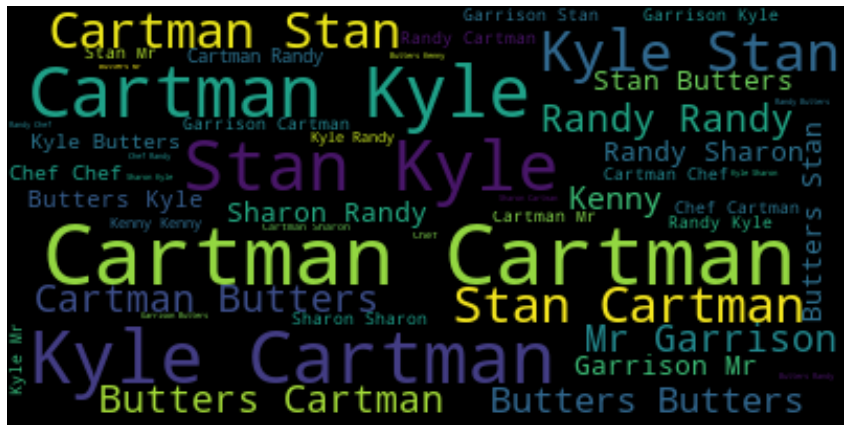

In [0]:
# Посмотрим на облако слов
from wordcloud import WordCloud, ImageColorGenerator
charNames = ' '.join([str(char) for char in data.Character])

wordcloud = WordCloud(max_words=200, background_color="black").generate(charNames)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

<Figure size 720x432 with 0 Axes>

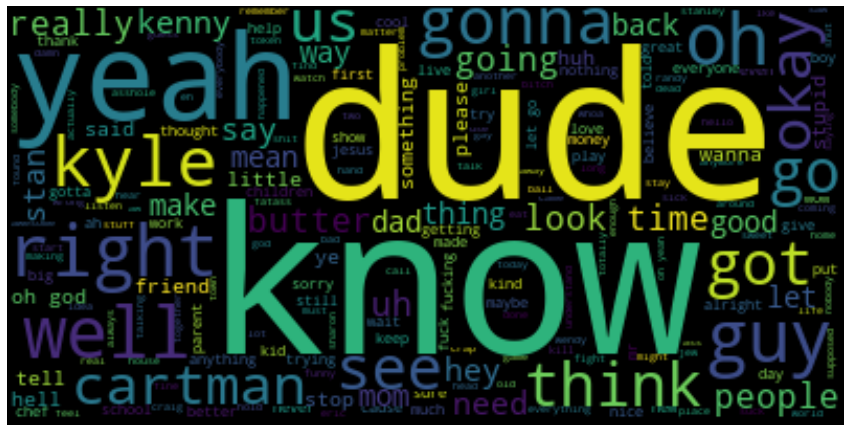

In [0]:
allWords = ' '.join([str(line) for line in dataNew.Line])


wordcloud = WordCloud(max_words=200, background_color="black").generate(allWords)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

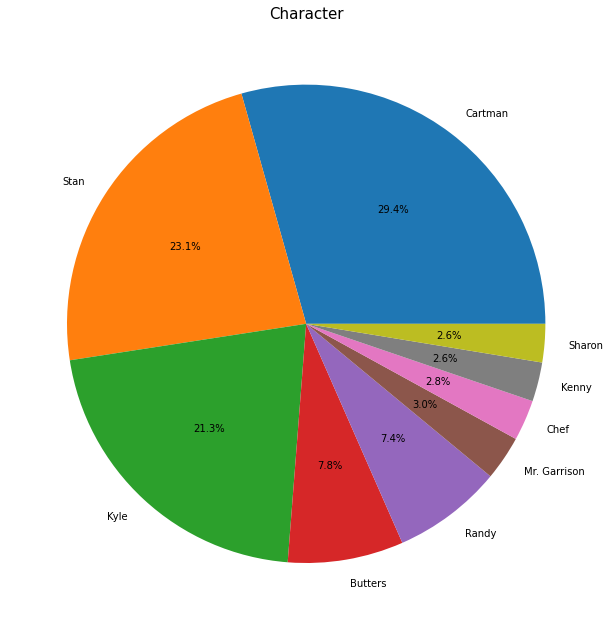

In [0]:
labels = data.Character.value_counts().index
freq = data.Character.value_counts().values
plt.figure(figsize=(11,11))
plt.pie(freq, labels=labels, autopct="%1.1f%%")
plt.title('Character', size=15)
plt.show()

In [0]:
# Возьмём только персонажей, у к-ых более 800 реплик.

data = data[data['numLines'] > 800]

In [18]:
data.shape

(33284, 3)

In [19]:
# Остаётся девять персонажей -> девять классов.

data['Character'].value_counts()

Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Chef             917
Kenny            881
Sharon           862
Name: Character, dtype: int64

In [20]:
print(max([len(line) for line in data.Line]))

print(min([len(line) for line in data.Line]))

1563
3


In [0]:
dataNew = pd.DataFrame(columns=['Character', 'Line', 'numLines'])

for rowIndex, row in data.iterrows():
  if len(row['Line']) < 3:
    continue
  dataNew.loc[rowIndex] = row

In [22]:
dataNew.head()

,Character,Line,numLines
0,Stan,"You guys, you guys! Chef is going away. \n",7680
1,Kyle,Going away? For how long?\n,7099
2,Stan,Forever.\n,7680
3,Chef,I'm sorry boys.\n,917
4,Stan,"Chef said he's been bored, so he joining a gro...",7680


In [23]:
print(max([len(line) for line in dataNew.Line]))

print(min([len(line) for line in dataNew.Line]))

1563
3


In [0]:
# Создадим отдельную функцию для очистки текста - соберём кусочно из регулярок.

import re

def cleanText(text: str) -> str:

    text = text.lower()
    
    text = re.sub(r"\n", "",  text)
    text = re.sub(r"[-()]", "", text)
    text = re.sub(r"\.", " .", text)
    text = re.sub(r"\!", " !", text)
    text = re.sub(r"\?", " ?", text)
    text = re.sub(r"\,", " ,", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"ohh", "oh", text)
    text = re.sub(r"ohhh", "oh", text)
    text = re.sub(r"ohhhh", "oh", text)
    text = re.sub(r"ohhhhh", "oh", text)
    text = re.sub(r"ohhhhhh", "oh", text)
    text = re.sub(r"ahh", "ah", text)
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
    
    return text

In [0]:
dataNew['Line'] = dataNew['Line'].apply(lambda line: cleanText(line))

In [26]:
dataNew.head()

,Character,Line,numLines
0,Stan,you guys you guys chef is going away,7680
1,Kyle,going away for how long,7099
2,Stan,forever,7680
3,Chef,i am sorry boys,917
4,Stan,chef said he is been bored so he joining a gro...,7680


In [27]:
!pip install nltk

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
tokenizer = nltk.tokenize.WordPunctTokenizer()

stopWords = nltk.corpus.stopwords.words()

In [0]:
from nltk.stem.lancaster import LancasterStemmer

stemmer = LancasterStemmer()

In [30]:
stemmer.stem('guys')

'guy'

In [0]:
# Сделаем простую токенизацию с помощью nltk
# + соберём обратно вместе.

dataNew['Line'] = dataNew['Line'].apply(lambda line: tokenizer.tokenize(line))
dataNew['Line'] = dataNew['Line'].apply(lambda line: ' '.join(line))

In [0]:
# И уберём стоп-слова, к-е есть в nltk

def removeStopWords(sentence: str) -> str:
  cleanedSentence = [word for word in sentence.split() if word not in stopWords]
  return ' '.join(cleanedSentence)

In [0]:
dataNew['Line'] = dataNew['Line'].apply(removeStopWords)

In [34]:
dataNew.head()

,Character,Line,numLines
0,Stan,guys guys chef going away,7680
1,Kyle,going away long,7099
2,Stan,forever,7680
3,Chef,sorry boys,917
4,Stan,chef said bored joining group called super adv...,7680


In [35]:
dataNew.Character.value_counts()

Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Chef             917
Kenny            881
Sharon           862
Name: Character, dtype: int64

In [36]:
# Кто, если не Картман

dataNew.Character.describe()

count       33284
unique          9
top       Cartman
freq         9774
Name: Character, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Нужно перекодировать персонажей, к-е сейчас в виде строк
# в числа.

le = LabelEncoder()
character = le.fit_transform(dataNew['Character'])
print(np.unique(character))

[0 1 2 3 4 5 6 7 8]


In [0]:
dataNew['Character'] = character

In [40]:
dataNew.head()

,Character,Line,numLines
0,8,guys guys chef going away,7680
1,4,going away long,7099
2,8,forever,7680
3,2,sorry boys,917
4,8,chef said bored joining group called super adv...,7680


In [0]:
# Соберём все предобработанные реплики в одно место.

allLines = [line for line in dataNew.Line]

## Bag of Words

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')

In [0]:
# Будет использоваться дефолтный TF токенизатор, к-ый
# Для каждого слова может возвратить индекс, под к-ым это слово находится в словаре

tokenizer.fit_on_texts(allLines)

In [0]:
# Преобразуем все реплики в векторы из чисел

lines = [tokenizer.texts_to_sequences([sentence])[0] for sentence in dataNew['Line']]

In [48]:
print('\nLine: ', dataNew['Line'][0],'\nLine in sequence format: ', lines[0])

print()

print('\nLine: ', dataNew['Line'][20],'\nLine in sequence format: ', lines[20])

print()

print('\nLine: ', dataNew['Line'][100],'\nLine in sequence format: ', lines[100])


Line:  guys guys chef going away 
Line in sequence format:  [11, 11, 101, 26, 80]


Line:  reverse jew 
Line in sequence format:  [33, 35]


Line:  specializes asshole kyle 
Line in sequence format:  [438, 60]


In [0]:
# Теперь необходимо это представить в виде DF

dataBowRaw = dataNew.copy()

dataBowRaw['Line'] = lines
dataBowRaw.drop(columns=['numLines'], inplace=True)

In [54]:
dataBowRaw.head()

,Character,Line
0,8,"[11, 11, 101, 26, 80]"
1,4,"[26, 80, 145]"
2,8,[531]
3,2,"[69, 178]"
4,8,"[101, 57, 1960, 2528, 838, 257, 511, 918, 519]"


In [55]:
maxLength = max([len(sentence) for sentence in dataBowRaw['Line']])
maxLength

143

In [0]:
lineBow = []

for line_ in dataBowRaw['Line']:
  if len(line_) < maxLength: # Нужно, чтобы все данные были в одном формате - одинаковой длины.
    for i in range(maxLength - len(line_)):
      line_.append(0) # Если меньше - добавим нули - padding.
  lineBow.append(line_)

In [57]:
dataBowRaw['Line'] = lineBow

dataBowRaw.head()

,Character,Line
0,8,"[11, 11, 101, 26, 80, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,4,"[26, 80, 145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,8,"[531, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,2,"[69, 178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,8,"[101, 57, 1960, 2528, 838, 257, 511, 918, 519,..."


In [58]:
# Теперь представим это в виде очень разреженной матрицы, где каждое слово будет 
# столбцом.

dataBow = pd.DataFrame(np.stack(list(dataBowRaw['Line'])))
dataBow['Character'] = dataBowRaw['Character']

print(dataBow.shape)
print()
dataBow.head()

# В итоге получается 143 фичи.

(33284, 144)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,Character
0,11,11,101,26,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0
1,26,80,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0
2,531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0
3,69,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
4,101,57,1960,2528,838,257,511,918,519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0


In [0]:
dataBow.dropna(inplace=True)

## TF-IDF векторизация

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3)) # Будет использоваться окно для n-грамм = 3, 
# т.к. текстов относительно немного + реплики короткие -> лучше захватить побольше информации;
# Остальные параметры можно оставить дефолтными, т.к. данных, опять же, не так много, чтобы делать
# ограничения на max_features\max_df

vectorizedLines = vectorizer.fit_transform(allLines)

In [63]:
vectorizedLines.shape
# 224 тысячи потенциальных фич

(33284, 224364)

In [0]:
# Уменьшаем размерности.

from sklearn.decomposition import TruncatedSVD

# Т.к. реплики довольно короткие -> можно сделать побольше компонент, чем обычные 200.
svd = TruncatedSVD(n_components=400, n_iter=3, random_state=42)

truncatedLines = svd.fit_transform(vectorizedLines)

# Останется 400 фич.

In [67]:
# Как и с BoW: необходимо преобразовать в DF.

dataTFIDF = pd.DataFrame(truncatedLines)
dataTFIDF['Character'] = dataNew.Character

dataTFIDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,Character
0,0.002235,0.008529,0.010471,0.004607,0.014203,0.024286,0.009322,0.031200,0.002570,0.081062,0.048322,-0.002590,0.018650,0.036692,0.008207,0.161678,-0.027818,0.006035,0.079909,-0.015863,0.005162,-0.094543,0.182697,0.133654,-0.076607,-0.059376,0.001795,-0.001489,0.000622,0.000534,-0.009638,-0.007439,-0.026562,-0.000706,0.008402,-0.019740,-0.006678,-0.014449,0.054006,-0.050786,...,0.000907,0.005881,0.004822,-0.003737,0.004877,0.018300,0.016733,-0.005735,0.024884,-0.003080,-0.007163,0.027617,-0.002183,-0.012658,-0.002829,0.005456,-0.005430,-0.017363,-0.001505,-0.005795,-0.001081,-0.000213,0.014446,-0.005082,0.014740,-0.013222,-0.006892,-0.004499,0.012674,0.018971,0.013085,0.014874,-0.022518,0.017147,-0.004301,-0.006226,0.012006,-0.000681,-0.000642,8.0
1,0.001167,0.004113,0.009362,0.002728,0.006359,0.013223,0.006160,0.023870,0.001076,0.050456,0.003075,0.000105,0.019553,0.053055,-0.008760,0.212598,-0.033111,-0.014132,-0.014618,-0.000713,0.000095,-0.001794,-0.013238,-0.006665,0.008360,0.001464,0.002349,0.001222,-0.005302,-0.001065,-0.000054,0.000942,-0.002413,0.001506,0.001506,0.000124,-0.000438,-0.000707,0.001645,-0.001353,...,-0.004357,0.001321,-0.001560,0.007214,0.002779,-0.003326,-0.006306,0.000540,0.000466,-0.002198,0.003906,0.005003,-0.003790,0.002613,-0.003398,0.003692,0.005477,0.002516,0.004288,-0.007727,0.001524,-0.000144,0.000790,0.002736,-0.001397,0.003906,0.004447,0.001715,0.000880,0.003206,-0.003267,0.005671,-0.002892,0.000972,-0.003092,-0.002143,0.002509,-0.000531,-0.003954,4.0
2,0.000207,0.000451,0.000580,0.000057,0.000490,0.000787,0.000672,0.000280,0.000366,0.000248,0.000368,0.000331,0.000552,0.001259,0.000934,0.000109,0.000578,0.000842,0.002612,-0.000308,-0.000273,-0.000722,-0.000461,-0.000419,0.000239,0.000148,0.000268,0.000807,0.000018,0.000525,0.000274,0.000549,0.002336,0.002006,0.003059,-0.002113,-0.001773,-0.000235,0.005582,-0.001604,...,-0.017921,-0.003592,-0.006688,0.006408,-0.010378,-0.004702,0.025592,-0.001657,-0.002140,-0.020760,0.012559,-0.016288,-0.011090,-0.021341,0.014945,0.001152,0.000257,0.007129,0.010586,0.018171,-0.008117,-0.042058,0.054529,-0.034137,-0.002608,-0.030305,-0.009388,-0.002781,0.007437,0.061015,0.016125,0.001624,-0.029270,-0.016570,0.016319,-0.015421,-0.015331,-0.038559,-0.024247,8.0
3,0.000747,0.004250,0.002600,0.001345,0.002977,0.005726,0.004790,0.001041,0.001120,0.003175,0.002749,0.001979,0.006258,0.001837,-0.000880,0.000646,0.004250,0.005889,0.011813,0.002100,-0.001667,0.005440,-0.000254,0.000508,-0.002580,-0.000828,-0.005682,-0.000619,-0.001120,0.000324,0.000582,0.001072,0.006781,0.010720,0.011685,-0.010618,-0.005802,0.006596,0.005053,-0.008003,...,0.001745,0.004960,-0.002455,-0.003372,0.004422,0.004096,0.003558,0.003730,0.006771,-0.003512,-0.002482,0.001100,-0.007543,0.002785,-0.006686,0.001443,-0.001304,0.002440,0.004073,-0.000008,-0.000863,0.001014,-0.002432,-0.006633,-0.001967,-0.003185,0.003436,0.001844,0.000816,0.001372,0.003886,-0.002213,0.001649,-0.006103,-0.002272,0.003130,-0.000564,-0.002645,0.007258,2.0
4,0.000598,0.001351,0.001225,0.000557,0.001742,0.001971,0.001065,0.001442,0.000646,0.002992,0.003910,0.000687,0.001029,0.001098,0.000128,0.000015,0.001933,0.003220,0.005745,0.002026,-0.000187,0.001800,-0.000297,-0.000244,0.002179,0.001914,-0.000147,0.000159,-0.000102,-0.000059,0.000561,0.000351,0.006188,0.008881,0.018906,-0.020117,-0.007791,-0.009553,0.040780,-0.031021,...,-0.004066,0.004091,-0.003423,-0.006085,-0.004198,-0.006430,0.008278,-0.000288,0.002308,-0.005721,-0.004942,0.003748,-0.010075,-0.003280,-0.002185,0.002330,0.009173,0.007186,0.018964,-0.016977,0.004291,-0.005757,0.015614,-0.007086,-0.004419,-0.000341,0.004783,-0.008172,0.003283,-0.005674,-0.015763,0.003051,-0.011477,0.008072,0.0

## TF-IDF vs. BoW

TF-IDF удалось сохранить больше информации + с ней можно больше сделать, т.е. по-разному сжимать\оставить, какая есть. 

+ У TF-IDF не просто целочисленное представление, а числа с плав. точкой, в которых можно сохранить больше информации. 

В это же время: BoW - довольно ограничен в выборе -> меньше информации + словарь ограничен текущими словами.

## Word2Vec на текущих данных

In [0]:
from gensim.models import Word2Vec

In [69]:
allLines[0]

'guys guys chef going away'

In [72]:
# Преобразование исходных данных в те, к-е можно дать W2V модели.

sentencesForW2V = []

for sentence in allLines:
  sentencesForW2V.append(sentence.split())

# Обучение модели - заняло довольно много времени.
# Впоследствии загружаем предобученную - она приложена к письму.

# w2vModel = Word2Vec(size=150, # Немного увеличим размер вектора-слова, чтобы взять больше информации; 
#                      alpha=0.03, # Чуть увеличим начальный learning rate.
#                     )

# w2vModel.build_vocab(sentencesForW2V)

# w2vModel.train(sentencesForW2V, total_examples=w2vModel.corpus_count, epochs=10, report_delay=1)

# w2vModel.save('word2vec.model')

w2vModel = Word2Vec.load('word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [73]:
# Каждое слово - последовательность из 150.

w2vModel.wv['guy'].shape

(150,)

In [0]:
from functools import reduce

def arrayReducer(firstArray, secondArray): # Для преобразования из двух массивов - в один - усреднённый.
  return np.mean((firstArray, secondArray), axis=0)

def transformSentence(sentence, embeddingsVocab, embeddingShape):
  """
  Нужно сделать из W2V - Sentece2Vec - будем это делать с помощью взятия среднего от всех векторов-слов в предложении.
  В результате получится последовательность из 150 - для каждого предложения.
  """
  
  w2vSentence = []
  
  for word in sentence.split():
    if word in embeddingsVocab.wv:
      w2vSentence.append(embeddingsVocab.wv[word])
    else:
      w2vSentence.append(np.zeros(embeddingShape)) # Если слова нет в словаре - заполняем нулями.
  
  if not w2vSentence:
    return np.zeros(embeddingShape)
  transformedSentence = reduce(arrayReducer, w2vSentence)

  return transformedSentence

In [0]:
linesW2V = [transformSentence(sentence, w2vModel, (150,)) for sentence in dataNew['Line']]

In [0]:
dataW2V = dataNew.copy()
dataW2V.drop(columns=['Line'], inplace=True)

In [0]:
dataW2V['w2vLines'] = linesW2V
dataW2V.drop(columns=['numLines'], inplace=True)

In [81]:
dataW2V.head()

,Character,w2vLines
0,8,"[-0.031254824, 0.028579004, 0.5289348, -0.1371..."
1,4,"[0.085651256, 0.10496869, 0.3726716, -0.200191..."
2,8,"[0.0654122, -0.031670466, 0.4209725, -0.050980..."
3,2,"[-0.0139539335, -0.2954613, -0.015456215, 0.25..."
4,8,"[0.083868995, -0.08318359, 0.3354459, 0.011881..."


In [82]:
# Так же, как и раньше - сделаем большую разреженную матрицу

dataW2V = pd.DataFrame(np.stack(list(dataW2V['w2vLines'])))

dataW2V['Character'] = dataNew['Character']

dataW2V.head()

# 150 фич

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,Character
0,-0.031255,0.028579,0.528935,-0.137144,-0.122610,-0.197090,0.086801,-0.414025,-0.141940,-0.103202,0.363747,0.467206,0.635895,-0.092765,-0.157599,-0.095132,0.084802,0.034961,-0.343944,0.138304,-0.134310,-0.254758,-0.265926,0.170406,-0.311767,-0.046239,-0.115078,-0.045275,-0.022383,0.159999,-0.148527,-0.197294,-0.357259,0.215112,0.241107,-0.224109,-0.252653,-0.152024,0.008443,0.392672,...,-0.118734,-0.060072,0.237625,-0.275373,0.017273,0.106543,-0.151886,0.343252,-0.243783,0.249862,-0.049073,0.194245,0.661844,0.264787,-0.604747,-0.330376,0.041949,0.202097,0.048490,-0.090125,-0.048421,-0.148745,0.003573,0.348245,0.221852,-0.101128,-0.098643,0.165262,-0.775795,-0.112916,-0.157695,0.051531,0.141812,0.258549,0.092892,-0.385622,-0.026196,0.120318,0.071950,8.0
1,0.085651,0.104969,0.372672,-0.200191,0.054937,-0.146794,0.141654,-0.558524,-0.062271,-0.116513,0.444070,0.273398,0.456833,0.102144,-0.035972,-0.292171,0.144857,-0.063010,-0.418714,-0.107858,-0.152655,-0.084273,-0.168371,0.241827,-0.227851,-0.234883,0.039453,-0.113707,-0.076438,0.228836,-0.149916,-0.347617,-0.428775,0.250088,0.294603,-0.184722,-0.263387,-0.127365,-0.009469,0.252311,...,-0.139626,0.087515,0.076745,-0.215668,0.056135,0.134811,-0.341361,0.533662,-0.040347,0.009091,-0.103938,0.410209,0.404534,0.125883,-0.440855,-0.133258,-0.137182,0.242642,0.058607,0.038453,-0.092778,-0.334580,0.034078,0.219307,0.057839,-0.207841,0.049128,0.132558,-0.743425,0.014341,-0.086588,-0.073627,0.216567,0.205504,-0.080541,-0.450813,-0.053509,-0.133357,0.044055,4.0
2,0.065412,-0.031670,0.420972,-0.050981,-0.058578,-0.060901,-0.028651,-0.342201,-0.169722,-0.100234,0.393230,0.233379,0.350919,0.054195,-0.113146,-0.249038,0.144225,-0.038803,-0.076221,-0.114797,0.010178,-0.213754,-0.127402,-0.028859,-0.198268,-0.177481,-0.106051,-0.007559,-0.124657,0.178500,-0.242356,-0.228990,-0.141868,0.146513,-0.039063,-0.152633,-0.182672,-0.041747,0.066218,0.108523,...,0.067890,0.006722,0.259146,-0.016277,-0.120238,0.051132,-0.171608,0.338052,0.004580,0.088065,-0.134368,0.222558,0.302655,0.020845,-0.273472,-0.145047,-0.017283,0.139010,-0.041612,-0.073960,0.047364,-0.244320,-0.046644,0.233399,0.159546,-0.150775,-0.098359,0.208317,-0.458746,-0.106514,0.042335,0.109098,0.114984,0.245057,-0.173370,-0.393934,-0.086147,0.043041,0.124555,8.0
3,-0.013954,-0.295461,-0.015456,0.255785,0.058133,-0.027216,-0.010945,0.043320,-0.305275,-0.443028,0.338295,0.281192,0.137418,0.378786,-0.228640,-0.303160,-0.254932,-0.029583,0.134470,-0.187265,0.315417,-0.486104,-0.124369,-0.134719,-0.234404,-0.135698,-0.331812,-0.132048,-0.564184,0.346806,-0.443602,-0.090780,0.288391,0.116336,-0.119549,-0.060937,0.105243,-0.207466,0.079830,0.607811,...,0.227845,0.015578,0.324327,-0.047381,-0.235084,0.159725,-0.071014,0.069341,-0.138941,0.175539,-0.161280,0.118150,0.371064,0.468078,0.036802,0.109155,-0.191996,0.587934,0.269705,0.057452,0.147258,-0.322960,0.085716,0.545529,0.244338,-0.194082,0.039591,0.509744,-0.230555,0.027271,-0.016141,0.190047,0.055872,0.406932,-0.540083,-0.395304,0.048831,0.119168,0.089857,2.0
4,0.083869,-0.083184,0.335446,0.011881,-0.017785,-0.058841,-0.065286,-0.244756,-0.210690,-0.170757,0.383223,0.227010,0.234056,0.182855,-0.127539,-0.312676,0.116925,-0.077006,0.046116,-0.146922,0.084176,-0.201460,-0.009024,-0.103248,-0.160474,-0.223179,-0.106492,-0.050768,-0.247860,0.253661,-0.326044,-0.292959,-0.043105,0.092715,-0.174534,-0.138714,-0.125192,0.000779,0.013820,0.106517,...,0.099018,0.089290,0.157314,0.094786,-0.178782,0.040718,-0.213784,0.281836,0.004567,0.052451,-0.170551,0.252331,0.192845,0.019049,-0.135566,-0.007620,-0.036856,0.213764,-0.020590,0.022156,0.031298,-0.239661,-0.033203,0.201552,0.167684,-0.216623,-0.120235,0.281103,-0.335405,-0.

In [83]:
dataW2V.shape

(33284, 151)

## Machine Learning Algorithms Part

### Prerequisites

In [0]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [0]:
# Пришлось сделать отдельную функцию, т.к. по каким-то причинам не импортировался модуль.

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
# Будет отдельная вспомогательная функция.
# Она принимает модель, тренирует и выводит значения метрик + confusion matrix.

def trainTestPredictDisplayResults(model: sklearn.base,
                     trainX, 
                     trainY, 
                     testX, 
                     testY):
  model.fit(trainX, trainY)

  predictions = model.predict(testX)

  print("Accuracy:",
      round(metrics.accuracy_score(testY, predictions), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(testY, predictions), 5))

  print()
  print(metrics.classification_report(testY, predictions))

  plot_confusion_matrix(testY, predictions)

## Note

Сначала будут алгоритмы без тюнинга параметров, затем будет выбран один наиболее многообещающий ->  к нему будут подобраны параметры.

### BoW

In [0]:
target = dataBow['Character'].values

In [0]:
(trainData, testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(dataBow.drop(columns=['Character']),
                                            target,
                                            test_size=0.3, 
                                            random_state=5)

#### DecisionTreeClassifier

Accuracy: 0.20789 
Balanced accuracy: 0.11703

              precision    recall  f1-score   support

         0.0       0.11      0.11      0.11       431
         1.0       0.32      0.36      0.34      1447
         2.0       0.07      0.06      0.07        96
         3.0       0.02      0.02      0.02        93
         4.0       0.18      0.18      0.18       935
         5.0       0.04      0.03      0.03       100
         6.0       0.10      0.09      0.09       427
         7.0       0.04      0.03      0.03       113
         8.0       0.20      0.17      0.18       923

    accuracy                           0.21      4565
   macro avg       0.12      0.12      0.12      4565
weighted avg       0.20      0.21      0.20      4565

Confusion matrix, without normalization
[[ 48 143   9  15  88  10  27   9  82]
 [131 523  16  47 299  23 134  23 251]
 [  5  28   6   0  29   1   5   2  20]
 [ 12  34   2   2  16   2   9   0  16]
 [ 75 353  20  31 166  17  85  11 177]
 [  7  34   2

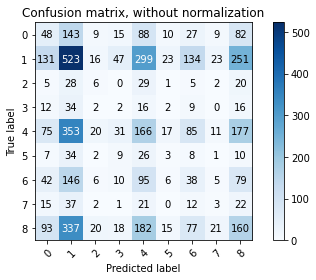

In [91]:
trainTestPredictDisplayResults(DecisionTreeClassifier(random_state=0), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Каждая пятая реплика угадана верно.

Но результат не слишком правдивый (видно по balanced & macro accuracy) из-за скошенности выборки.

#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.26221 
Balanced accuracy: 0.1145

              precision    recall  f1-score   support

         0.0       0.12      0.03      0.05       431
         1.0       0.32      0.59      0.41      1447
         2.0       0.07      0.01      0.02        96
         3.0       0.04      0.01      0.02        93
         4.0       0.19      0.18      0.18       935
         5.0       0.00      0.00      0.00       100
         6.0       0.10      0.03      0.05       427
         7.0       0.07      0.02      0.03       113
         8.0       0.21      0.17      0.18       923

    accuracy                           0.26      4565
   macro avg       0.12      0.11      0.10      4565
weighted avg       0.21      0.26      0.22      4565

Confusion matrix, without normalization
[[ 14 254   2   3  80   1  12   3  62]
 [ 33 847   6   3 276   1  39   8 234]
 [  6  50   1   0  23   0   2   0  14]
 [  6  51   0   1  12   0   3   1  19]
 [ 20 561   2   7 165   3  25   6 146]
 [  1  63   0 

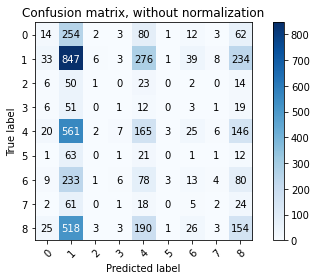

In [94]:
trainTestPredictDisplayResults(RandomForestClassifier(n_estimators=100, n_jobs=-1), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Примерно схожая ситуация с деревом решений.

#### Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.31369 
Balanced accuracy: 0.11346

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.96      0.48      1447
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00        93
         4.0       0.25      0.03      0.05       935
         5.0       0.11      0.01      0.02       100
         6.0       0.33      0.01      0.01       427
         7.0       0.00      0.00      0.00       113
         8.0       0.18      0.02      0.03       923

    accuracy                           0.31      4565
   macro avg       0.13      0.11      0.07      4565
weighted avg       0.22      0.31      0.17      4565

Confusion matrix, without normalization
[[   0  409    0    0   10    1    2    0    9]
 [   3 1383    0    0   28    3    0    0   30]
 [   0   92    0    1    1    1    0    0    1]
 [   0   86    0    0    3    1    1    1    1]
 [   0  878    0

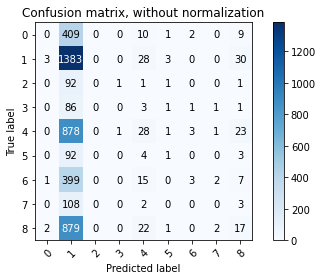

In [96]:
trainTestPredictDisplayResults(LogisticRegression(), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Не сильно отличается результат.

Разве что некоторые классы остались совсем без правильно предсказанных.

#### SVC

Accuracy: 0.31479 
Balanced accuracy: 0.11168

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.97      0.48      1447
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00        93
         4.0       0.17      0.01      0.02       935
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       427
         7.0       0.00      0.00      0.00       113
         8.0       0.25      0.02      0.04       923

    accuracy                           0.31      4565
   macro avg       0.08      0.11      0.06      4565
weighted avg       0.19      0.31      0.16      4565

Confusion matrix, without normalization
[[   0  411    0    0    6    0    0    0   14]
 [   0 1406    0    0   25    0    0    0   16]
 [   0   93    0    0    2    0    0    0    1]
 [   0   90    0    0    2    0    0    0    1]
 [   0  912    0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


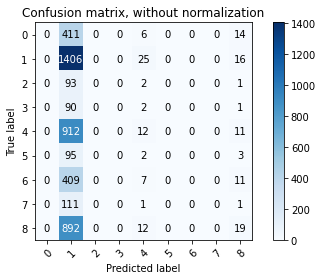

In [97]:
trainTestPredictDisplayResults(SVC(), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Будто бы те же самые результаты.

### TF-IDF

In [0]:
dataTFIDF.dropna(inplace=True)
target = dataTFIDF.Character.values

In [0]:
(trainData, testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(dataTFIDF.drop(columns=['Character']),
                                            target,
                                            test_size=0.3, 
                                            random_state=5)

#### DecisionTreeClassifier

Accuracy: 0.21621 
Balanced accuracy: 0.11365

              precision    recall  f1-score   support

         0.0       0.08      0.08      0.08       431
         1.0       0.32      0.37      0.35      1447
         2.0       0.02      0.02      0.02        96
         3.0       0.01      0.01      0.01        93
         4.0       0.22      0.22      0.22       935
         5.0       0.01      0.01      0.01       100
         6.0       0.13      0.11      0.12       427
         7.0       0.04      0.04      0.04       113
         8.0       0.19      0.17      0.18       923

    accuracy                           0.22      4565
   macro avg       0.11      0.11      0.11      4565
weighted avg       0.21      0.22      0.21      4565

Confusion matrix, without normalization
[[ 33 164  16  13  75   5  34   3  88]
 [148 537  25  41 288  27 101  32 248]
 [  5  31   2   2  17   2   8   4  25]
 [ 10  33   4   1  12   3   6   2  22]
 [ 84 322  14  30 202  21  69  24 169]
 [ 11  33   3

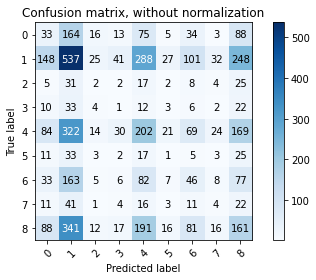

In [106]:
trainTestPredictDisplayResults(DecisionTreeClassifier(random_state=0), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Очень похоже на результат с BoW.

#### Random Forest

Accuracy: 0.2874 
Balanced accuracy: 0.11945

              precision    recall  f1-score   support

         0.0       0.11      0.02      0.03       431
         1.0       0.32      0.70      0.44      1447
         2.0       0.15      0.02      0.04        96
         3.0       0.00      0.00      0.00        93
         4.0       0.22      0.17      0.19       935
         5.0       0.11      0.01      0.02       100
         6.0       0.09      0.01      0.02       427
         7.0       0.09      0.01      0.02       113
         8.0       0.22      0.14      0.17       923

    accuracy                           0.29      4565
   macro avg       0.15      0.12      0.10      4565
weighted avg       0.22      0.29      0.22      4565

Confusion matrix, without normalization
[[   8  295    2    1   68    0    6    0   51]
 [  25 1012    4    1  219    3   13    4  166]
 [   1   72    2    0    6    1    1    0   13]
 [   3   59    0    0   15    0    0    0   16]
 [  13  631    1 

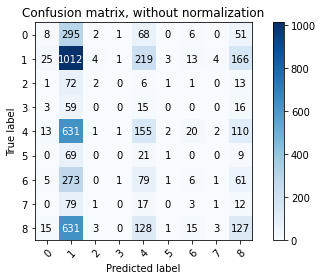

In [109]:
trainTestPredictDisplayResults(RandomForestClassifier(n_estimators=100, n_jobs=-1), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Примерно схожая ситуация с деревом решений.

#### Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.29901 
Balanced accuracy: 0.11052

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.87      0.47      1447
         2.0       0.33      0.01      0.02        96
         3.0       0.00      0.00      0.00        93
         4.0       0.19      0.06      0.09       935
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       427
         7.0       0.00      0.00      0.00       113
         8.0       0.17      0.06      0.08       923

    accuracy                           0.30      4565
   macro avg       0.11      0.11      0.07      4565
weighted avg       0.18      0.30      0.18      4565

Confusion matrix, without normalization
[[   0  379    0    0   29    0    0    0   23]
 [   5 1256    2    0   92    0    2    0   90]
 [   0   81    1    0    3    0    0    0   11]
 [   1   82    0    0    5    0    0    0    5]
 [   1  808    0

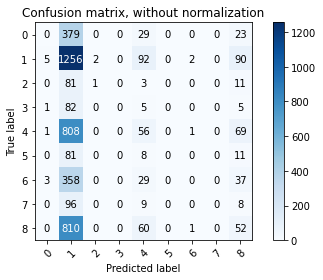

In [110]:
trainTestPredictDisplayResults(LogisticRegression(), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Не сильно отличается результат.

Разве что некоторые классы остались совсем без правильно предсказанных.

Очень всё ушло в предсказание наиболее популярного персонажа.

#### SVC

Accuracy: 0.30099 
Balanced accuracy: 0.11185

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.87      0.47      1447
         2.0       0.33      0.01      0.02        96
         3.0       0.00      0.00      0.00        93
         4.0       0.19      0.05      0.08       935
         5.0       0.00      0.00      0.00       100
         6.0       0.08      0.00      0.01       427
         7.0       0.00      0.00      0.00       113
         8.0       0.21      0.07      0.10       923

    accuracy                           0.30      4565
   macro avg       0.13      0.11      0.08      4565
weighted avg       0.20      0.30      0.19      4565

Confusion matrix, without normalization
[[   0  375    0    0   29    0    4    0   23]
 [   6 1257    2    0   78    0    6    0   98]
 [   0   85    1    0    1    0    0    0    9]
 [   1   78    0    0    5    0    0    0    9]
 [   3  814    0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


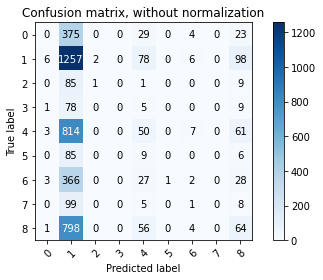

In [111]:
trainTestPredictDisplayResults(SVC(), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Немножко лучше, но не сильно + время обучения много больше.

### Word2Vec\\Sentence2Vec

In [0]:
dataW2V.dropna(inplace=True)
target = dataW2V.Character.values

In [0]:
(trainData, testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(dataW2V.drop(columns=['Character']),
                                            target,
                                            test_size=0.3, 
                                            random_state=5)

#### DecisionTreeClassifier

Accuracy: 0.21446 
Balanced accuracy: 0.11474

              precision    recall  f1-score   support

         0.0       0.12      0.12      0.12       431
         1.0       0.31      0.38      0.35      1447
         2.0       0.08      0.08      0.08        96
         3.0       0.01      0.01      0.01        93
         4.0       0.21      0.19      0.20       935
         5.0       0.00      0.00      0.00       100
         6.0       0.08      0.07      0.08       427
         7.0       0.02      0.01      0.01       113
         8.0       0.20      0.17      0.18       923

    accuracy                           0.21      4565
   macro avg       0.11      0.11      0.11      4565
weighted avg       0.20      0.21      0.21      4565

Confusion matrix, without normalization
[[ 50 161  11  12  78   7  37   6  69]
 [149 557  31  39 275  21 110  21 244]
 [  3  34   8   3   9   6  12   1  20]
 [  6  36   0   1  18   1   9   0  22]
 [ 83 371  16  24 175  20  76  16 154]
 [  7  39   1

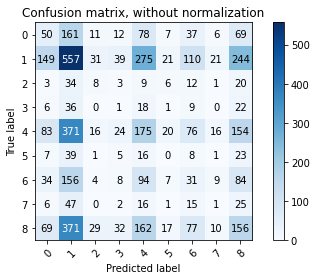

In [128]:
trainTestPredictDisplayResults(DecisionTreeClassifier(random_state=0), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Уже как-то грустно - с очень похожими результатами.

#### Random Forest

Accuracy: 0.26594 
Balanced accuracy: 0.11248

              precision    recall  f1-score   support

         0.0       0.05      0.01      0.02       431
         1.0       0.31      0.61      0.41      1447
         2.0       0.20      0.02      0.04        96
         3.0       0.00      0.00      0.00        93
         4.0       0.20      0.17      0.18       935
         5.0       0.07      0.01      0.02       100
         6.0       0.12      0.03      0.05       427
         7.0       0.00      0.00      0.00       113
         8.0       0.22      0.16      0.19       923

    accuracy                           0.27      4565
   macro avg       0.13      0.11      0.10      4565
weighted avg       0.20      0.27      0.21      4565

Confusion matrix, without normalization
[[  4 292   1   3  73   1   6   0  51]
 [ 29 888   4   1 282   5  23   1 214]
 [  0  58   2   0  17   1   0   0  18]
 [  4  64   0   0  12   0   1   0  12]
 [ 17 599   1   2 155   2  22   0 137]
 [  1  62   0

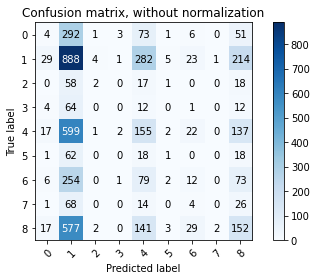

In [120]:
trainTestPredictDisplayResults(RandomForestClassifier(n_estimators=100, n_jobs=-1), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

(

#### Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.30887 
Balanced accuracy: 0.10999

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.95      0.47      1447
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00        93
         4.0       0.20      0.02      0.04       935
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       427
         7.0       0.00      0.00      0.00       113
         8.0       0.16      0.02      0.04       923

    accuracy                           0.31      4565
   macro avg       0.08      0.11      0.06      4565
weighted avg       0.17      0.31      0.17      4565

Confusion matrix, without normalization
[[   0  417    0    0    8    0    0    0    6]
 [   0 1370    0    0   24    0    0    0   53]
 [   0   91    0    0    3    0    0    0    2]
 [   0   87    0    0    2    0    0    0    4]
 [   0  892    0

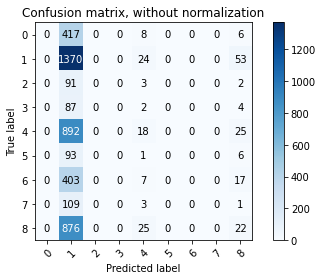

In [121]:
trainTestPredictDisplayResults(LogisticRegression(), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Не сильно отличается результат.

Очень всё ушло в предсказание наиболее популярного персонажа.

#### SVC

Accuracy: 0.31413 
Balanced accuracy: 0.11067

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.98      0.48      1447
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00        93
         4.0       0.18      0.01      0.01       935
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       427
         7.0       0.00      0.00      0.00       113
         8.0       0.18      0.01      0.01       923

    accuracy                           0.31      4565
   macro avg       0.08      0.11      0.06      4565
weighted avg       0.17      0.31      0.16      4565

Confusion matrix, without normalization
[[   0  425    0    0    2    0    0    0    4]
 [   0 1421    0    0   10    0    0    0   16]
 [   0   96    0    0    0    0    0    0    0]
 [   0   92    0    0    1    0    0    0    0]
 [   0  922    0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


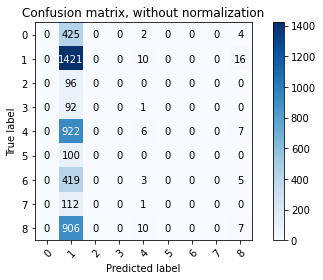

In [122]:
trainTestPredictDisplayResults(SVC(), 
                               trainData, trainDependentVariables, 
                               testData, 
                               testDependentVariables)

Так же, как и у логистической регрессии - всё ушло в предсказание самого частотного.

## Parameter tuning

Будет использоваться логистическая регрессия: есть многт параметров + она показала себя неплохо.

В качестве датасета будет использоваться с word2vec эмбеддингами, т.к. там был наилучший результат.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
LRModel = LogisticRegression()

In [0]:
# Испробуем жадный поиск, зададим пул параметров.
params = {'penalty': ['l1', 'l2'],
'C': [0.001, 0.01, 0.1, 1, 1.2, 5, 10],
'class_weight': [None, 'balanced'],
'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}

# # Чтобы было не так долго - уменьшим cv до 3.
# greedSearch = GridSearchCV(LRModel, params, cv=3)


# # Занимает много времени - лучше не запускать.
# greedSearch.fit(dataW2V.drop(columns=['Character']), dataW2V['Character'])

In [135]:
# greedSearch.best_estimator_

# LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l1',
#                    random_state=None, solver='saga', tol=0.0001, verbose=0,
#                    warm_start=False)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
# greedSearch.best_params_

# {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

{'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [0]:
LRIdeal = LogisticRegression(C=0.001, class_weight=None, penalty='l1', solver='saga') # Жадный поиск выявил маленький learning rate и l1 регуляризацию.

In [0]:
target = dataW2V.Character.values

(trainData, testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(dataW2V.drop(columns=['Character']),
                                            target,
                                            test_size=0.3, 
                                            random_state=5)

Accuracy: 0.31698 
Balanced accuracy: 0.11111

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      1.00      0.48      1447
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00        93
         4.0       0.00      0.00      0.00       935
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       427
         7.0       0.00      0.00      0.00       113
         8.0       0.00      0.00      0.00       923

    accuracy                           0.32      4565
   macro avg       0.04      0.11      0.05      4565
weighted avg       0.10      0.32      0.15      4565

Confusion matrix, without normalization
[[   0  431    0    0    0    0    0    0    0]
 [   0 1447    0    0    0    0    0    0    0]
 [   0   96    0    0    0    0    0    0    0]
 [   0   93    0    0    0    0    0    0    0]
 [   0  935    0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


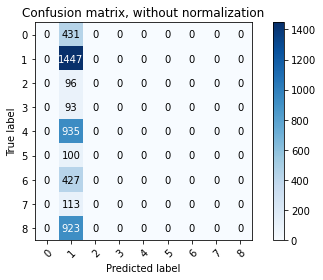

In [143]:
trainTestPredictDisplayResults(LRIdeal,
                               trainData,
                               trainDependentVariables,
                               testData,
                               testDependentVariables)

Что ж.

Ожидалось, конечно, лучше, чем небольшое улучшение (~1%).

Да и сделал алгоритм всё так, как не надо - всех определил в один, самый популярный, класс.

### Выводы по Machine Learning Algorithms

Сложно работать с текстом и классификацией - особенно когда не слишком можно интерпретировать сами эмбеддинги.

Алгоритмы все примерно работают на +\- одинаковом уровне, даже не сильно завися от того, как представлены реплики (BoW\TF-IDF\W2V).

## Визуализация данных в векторном пространстве

In [171]:
# Определим несколько слов (не так много, чтобы они не накладывались) для представления
keyWords = ['lord', 'guy', 'god', 'music']

embeddingClusters = []
wordClusters = []
for word in keyWords:
    embeddings = []
    words = []
    for similarWord, _ in w2vModel.most_similar(word, topn=30): # Возьмём из W2V модели все похожие, по мнению модели, слова на текущее.
        words.append(similarWord)
        embeddings.append(w2vModel[similarWord])
    embeddingClusters.append(embeddings) # Соберём все эмбеддинги для похожих слов.
    wordClusters.append(words) # Соберём все похожие слова.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [172]:
print(keyWords[2])
print(wordClusters[0][:10])

# Модель считает их похожими - и вполне обоснованно.

god
['blessed', 'praise', 'savior', 'rings', 'born', 'beautiful', 'cr', 'gifford', 'claus', 'mary']


In [0]:
# Для визуализации будет использоваться TSNE - относительно простой и разобранный.

from sklearn.manifold import TSNE
import numpy as np

embeddingClusters = np.array(embeddingClusters)
n, m, k = embeddingClusters.shape

tsneModel = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

embeddings = np.array(tsneModel.fit_transform(embeddingClusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

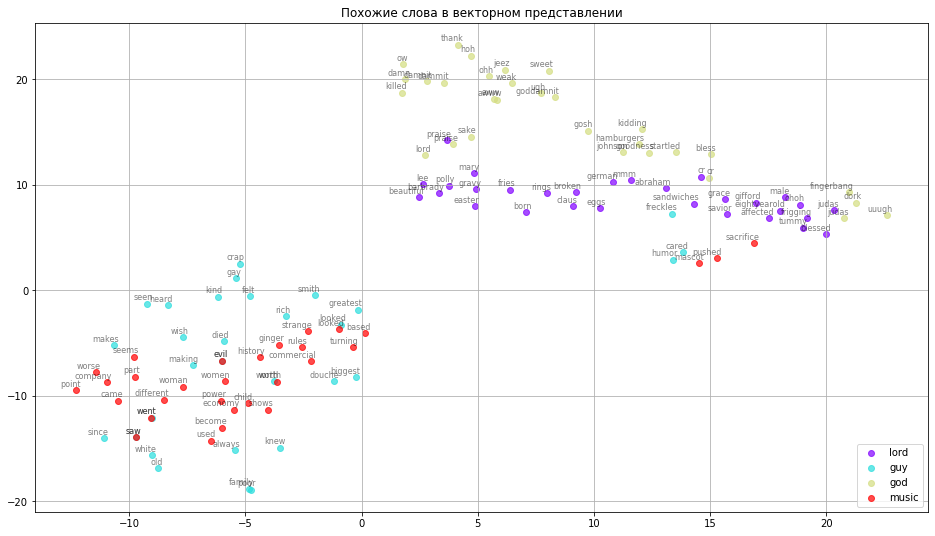

In [174]:
import matplotlib.cm as cm


def plotSimilarWords(title: str, labels: list, embeddingClusters, wordClusters, a): # Функция для отображение графика.
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embeddingClusters, wordClusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.show()


plotSimilarWords('Похожие слова в векторном представлении', keyWords, embeddings, wordClusters, 0.7)

Интересно и логично: god & lord в одной части - довольно схожие;
guy & music - в другой, тоже схожи между собой + отличаются от lord\god.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

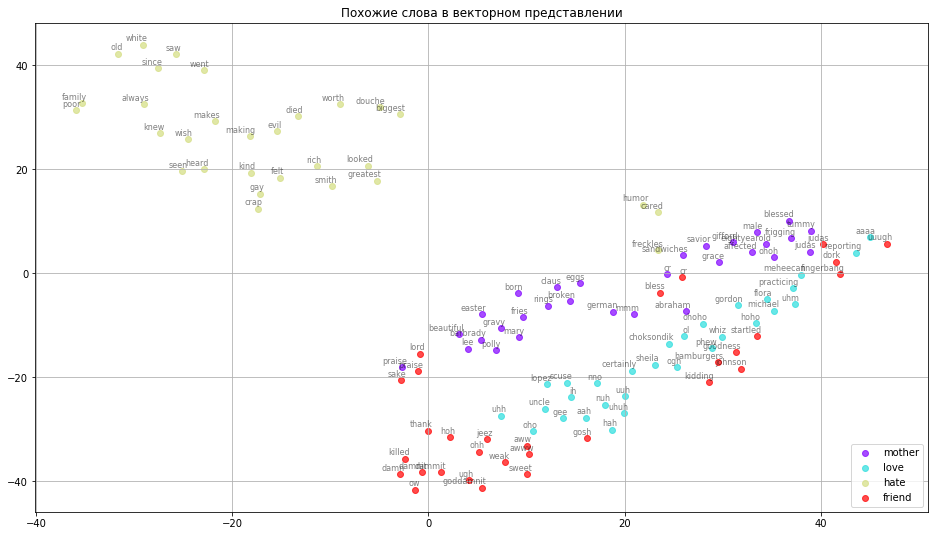

In [166]:
plotSimilarWords('Похожие слова в векторном представлении', ['mother', 'love', 'hate', 'friend'], embeddings, wordClusters, 0.7)

Тоже логичное представление: hate отличается от всех остальных по семантике.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

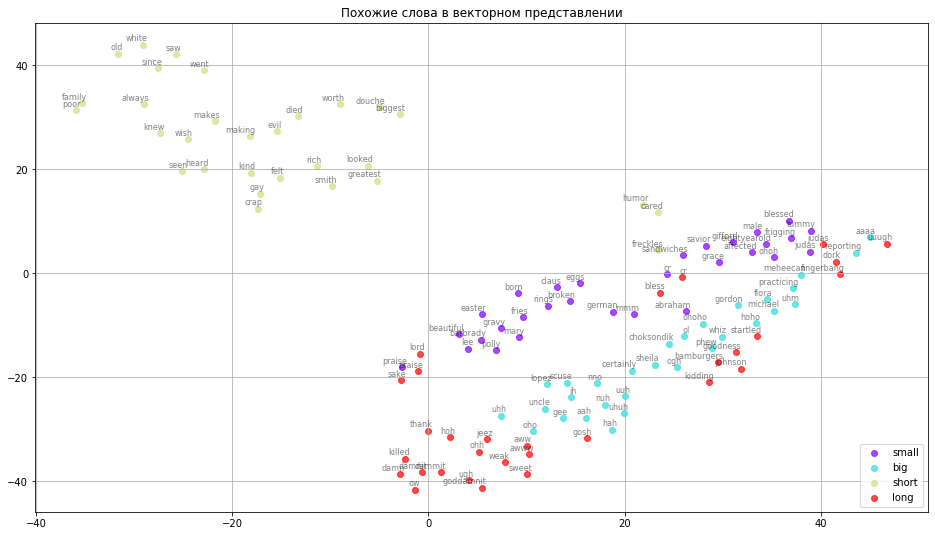

In [169]:
plotSimilarWords('Похожие слова в векторном представлении', ['small', 'big', 'short', 'long'], embeddings, wordClusters, 0.7)

Здесь тоже видна логичная разница short vs. long.

Хотя здесь схожие с big & small слова рядом друг с другом.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

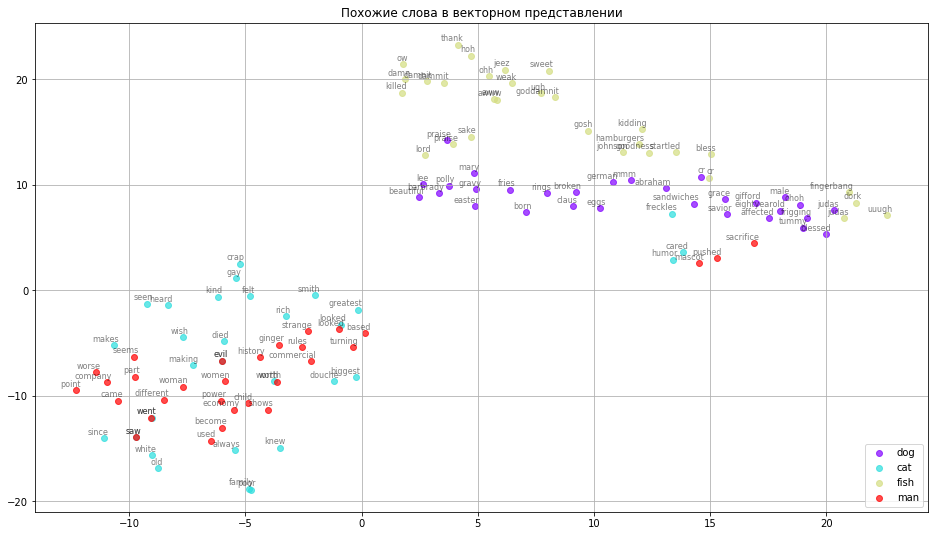

In [175]:
plotSimilarWords('Похожие слова в векторном представлении', ['dog', 'cat', 'fish', 'man'], embeddings, wordClusters, 0.7)

Well, well.